In [3]:
import os
import pandas as pd
from scipy.stats import entropy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
game_names = ['default_game', 'game1', 'game2', 'game3', 'game4', 'game5'] 

# 1. Summarize runs (by aggregating timesteps)

In [5]:
for game_name in game_names:

    log_summary = []
    filenames = os.listdir('./logs/')
    this_game_files = [filename for filename in filenames if game_name in filename]
    for filename in this_game_files:
        print(filename)

        # run number
        string_position = 'default_game__run0.csv'.index('__run')
        last_part = 'default_game__run0.csv'[string_position+5:]
        run_number = int(last_part.replace('.csv',''))

        # logs_df
        logs_df = pd.read_csv('./logs/' + filename)
        logs_df['nb_of_unhappy'] = logs_df['nb_of_unhappy_table0'] + logs_df['nb_of_unhappy_table1'] + logs_df['nb_of_unhappy_table2'] + logs_df['nb_of_unhappy_table3'] + logs_df['nb_of_unhappy_table4'] 



        # ===================================
        # time to equilibrium
        # ===================================
        equilibrium_reached_time = 99
        nb_of_consequitive_null_rounds = 0
        for index, row in logs_df.iterrows():
            if row['nb_of_unhappy'] == 0:
                nb_of_consequitive_null_rounds += 1
            else:
                nb_of_consequitive_null_rounds = 0

            if nb_of_consequitive_null_rounds >=3:
                equilibrium_reached_time = index -2
                break;

        if equilibrium_reached_time <= 0:
            equilibrium_reached_time = 1


        # ===================================
        # mean_happiness_checking_duration
        # ===================================
        mean_happiness_checking_duration = logs_df.loc[0:equilibrium_reached_time,'happiness_checking_duration'].mean()


        # ===================================
        # mean number of unhappy & variance of unhappy
        # ===================================
        unhappy_numbers = logs_df.loc[0:equilibrium_reached_time,'nb_of_unhappy']
        mean_number_of_unhappy = unhappy_numbers.mean()
        median_number_of_unhappy = unhappy_numbers.median()
        variance_of_unhappy_numbers = unhappy_numbers.var()


        # ===================================
        # entropy of final state
        # ===================================
        table_populations = []
        for table_nb in range(5):
            table_populations.append(logs_df.loc[equilibrium_reached_time, 'number_of_men_table' + str(table_nb)] + logs_df.loc[equilibrium_reached_time, 'number_of_women_table' + str(table_nb)])

        entropy_of_table_population = entropy(table_populations)


        # ===================================
        # average minority percent at final state
        # ===================================
        minority_percentages = []
        for table_nb in range(5):
            value1 = logs_df.loc[equilibrium_reached_time, 'number_of_men_table' + str(table_nb)] 
            value2 = logs_df.loc[equilibrium_reached_time, 'number_of_women_table' + str(table_nb)]
            if value1 > value2:
                minority_percent = value2 /(value1 + value2)
            else:
                minority_percent = value1 /(value1 + value2)
            minority_percentages.append(minority_percent)    
        average_minority_percent = np.mean(minority_percentages)
        inter_table_variance_in_minority_percentages = np.var(minority_percentages)


        log_summary.append({'time_to_equilibrium':equilibrium_reached_time, 
                            'mean_happiness_checking_duration':mean_happiness_checking_duration,
                            'mean_number_of_unhappy':mean_number_of_unhappy, 
                            'median_number_of_unhappy':median_number_of_unhappy, 
                            'variance_of_unhappy_numbers':variance_of_unhappy_numbers, 
                            'entropy_of_table_population':entropy_of_table_population, 
                            'average_minority_percent':average_minority_percent, 
                            'inter_table_variance_in_minority_percentages':inter_table_variance_in_minority_percentages})

    log_summary_df = pd.DataFrame(log_summary, index=range(len(log_summary)))
    log_summary_df.to_csv('./log summary/' + game_name + '.csv')

game1__run0.csv
game1__run1.csv
game1__run10.csv
game1__run100.csv
game1__run101.csv
game1__run102.csv
game1__run103.csv
game1__run104.csv
game1__run105.csv
game1__run106.csv
game1__run107.csv
game1__run108.csv

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in longlong_scalars



game1__run109.csv
game1__run11.csv
game1__run110.csv
game1__run111.csv
game1__run112.csv
game1__run113.csv
game1__run114.csv
game1__run115.csv
game1__run116.csv
game1__run117.csv
game1__run118.csv
game1__run119.csv
game1__run12.csv
game1__run120.csv
game1__run121.csv
game1__run122.csv
game1__run123.csv
game1__run124.csv
game1__run125.csv
game1__run126.csv
game1__run127.csv
game1__run128.csv
game1__run129.csv
game1__run13.csv
game1__run130.csv
game1__run131.csv
game1__run132.csv
game1__run133.csv
game1__run134.csv
game1__run135.csv
game1__run136.csv
game1__run137.csv
game1__run138.csv
game1__run139.csv
game1__run14.csv
game1__run140.csv
game1__run141.csv
game1__run142.csv
game1__run143.csv
game1__run144.csv
game1__run145.csv
game1__run146.csv
game1__run147.csv
game1__run148.csv
game1__run149.csv
game1__run15.csv
game1__run150.csv
game1__run151.csv
game1__run152.csv
game1__run153.csv
game1__run154.csv
game1__run155.csv
game1__run156.csv
game1__run157.csv
game1__run158.csv
game1__run159.

game1__run523.csv
game1__run524.csv
game1__run525.csv
game1__run526.csv
game1__run527.csv
game1__run528.csv
game1__run529.csv
game1__run53.csv
game1__run530.csv
game1__run531.csv
game1__run532.csv
game1__run533.csv
game1__run534.csv
game1__run535.csv
game1__run536.csv
game1__run537.csv
game1__run538.csv
game1__run539.csv
game1__run54.csv
game1__run540.csv
game1__run541.csv
game1__run542.csv
game1__run543.csv
game1__run544.csv
game1__run545.csv
game1__run546.csv
game1__run547.csv
game1__run548.csv
game1__run549.csv
game1__run55.csv
game1__run550.csv
game1__run551.csv
game1__run552.csv
game1__run553.csv
game1__run554.csv
game1__run555.csv
game1__run556.csv
game1__run557.csv
game1__run558.csv
game1__run559.csv
game1__run56.csv
game1__run560.csv
game1__run561.csv
game1__run562.csv
game1__run563.csv
game1__run564.csv
game1__run565.csv
game1__run566.csv
game1__run567.csv
game1__run568.csv
game1__run569.csv
game1__run57.csv
game1__run570.csv
game1__run571.csv
game1__run572.csv
game1__run573.c

game1__run939.csv
game1__run94.csv
game1__run940.csv
game1__run941.csv
game1__run942.csv
game1__run943.csv
game1__run944.csv
game1__run945.csv
game1__run946.csv
game1__run947.csv
game1__run948.csv
game1__run949.csv
game1__run95.csv
game1__run950.csv
game1__run951.csv
game1__run952.csv
game1__run953.csv
game1__run954.csv
game1__run955.csv
game1__run956.csv
game1__run957.csv
game1__run958.csv
game1__run959.csv
game1__run96.csv
game1__run960.csv
game1__run961.csv
game1__run962.csv
game1__run963.csv
game1__run964.csv
game1__run965.csv
game1__run966.csv
game1__run967.csv
game1__run968.csv
game1__run969.csv
game1__run97.csv
game1__run970.csv
game1__run971.csv
game1__run972.csv
game1__run973.csv
game1__run974.csv
game1__run975.csv
game1__run976.csv
game1__run977.csv
game1__run978.csv
game1__run979.csv
game1__run98.csv
game1__run980.csv
game1__run981.csv
game1__run982.csv
game1__run983.csv
game1__run984.csv
game1__run985.csv
game1__run986.csv
game1__run987.csv
game1__run988.csv
game1__run989.c

game2__run456.csv
game2__run457.csv
game2__run458.csv
game2__run459.csv
game2__run46.csv
game2__run460.csv
game2__run461.csv
game2__run462.csv
game2__run463.csv
game2__run464.csv
game2__run465.csv
game2__run466.csv
game2__run467.csv
game2__run468.csv
game2__run469.csv
game2__run47.csv
game2__run470.csv
game2__run471.csv
game2__run472.csv
game2__run473.csv
game2__run474.csv
game2__run475.csv
game2__run476.csv
game2__run477.csv
game2__run478.csv
game2__run479.csv
game2__run48.csv
game2__run480.csv
game2__run481.csv
game2__run482.csv
game2__run483.csv
game2__run484.csv
game2__run485.csv
game2__run486.csv
game2__run487.csv
game2__run488.csv
game2__run489.csv
game2__run49.csv
game2__run490.csv
game2__run491.csv
game2__run492.csv
game2__run493.csv
game2__run494.csv
game2__run495.csv
game2__run496.csv
game2__run497.csv
game2__run498.csv
game2__run499.csv
game2__run5.csv
game2__run50.csv
game2__run500.csv
game2__run501.csv
game2__run502.csv
game2__run503.csv
game2__run504.csv
game2__run505.csv

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\programdata\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-26e794e28139>", line 15, in <module>
    logs_df = pd.read_csv('./logs/' + filename)
  File "c:\programdata\miniconda3\lib\site-packages\pandas\io\parsers.py", line 676, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "c:\programdata\miniconda3\lib\site-packages\pandas\io\parsers.py", line 454, in _read
    data = parser.read(nrows)
  File "c:\programdata\miniconda3\lib\site-packages\pandas\io\parsers.py", line 1148, in read
    df = DataFrame(col_dict, columns=columns, index=index)
  File "c:\programdata\miniconda3\lib\site-packages\pandas\core\frame.py", line 435, in __init__
    mgr = init_dict(data, index, columns, dtype=dtype)
  File "c:\programdata\miniconda3\lib\site-packages\pandas\core\internals\construction.py", line 254, in init_dict
    ret

KeyboardInterrupt: 

# 2. Summarize games (by aggregating runs)

In [8]:
game_summaries = []
for game_name in game_names:
    log_summary_df = pd.read_csv('./log summary/' + game_name + '.csv')
    log_summary_df.describe()

    ended_simulations = log_summary_df[log_summary_df['time_to_equilibrium']<99]
    game_summary = {'game_name': game_name,
                    'mean_happiness_checking_duration': log_summary_df['mean_happiness_checking_duration'].mean(),
                    'percent_of_runs_not_ended_in_100_timesteps': len(log_summary_df[log_summary_df['time_to_equilibrium']==99]) / len(log_summary_df),
                    'mean_time_to_equilibrium': ended_simulations['time_to_equilibrium'].mean(),
                    'variance_between_time_to_equilibriums': ended_simulations['time_to_equilibrium'].var(),
                    'mean_number_of_unhappy': log_summary_df['mean_number_of_unhappy'].mean(),
                    'variance_in_unhappiness_between_timesteps': log_summary_df['variance_of_unhappy_numbers'].mean(),
                    'variance_in_unhappiness_between_games': log_summary_df['variance_of_unhappy_numbers'].var(),
                    'entropy_of_final_table_populations': ended_simulations['entropy_of_table_population'].mean(),
                    'variance_of_table_population_entropies': ended_simulations['entropy_of_table_population'].var(),
                    'average_minority_percent': ended_simulations['average_minority_percent'].mean()}
    game_summaries.append(game_summary)
game_summaries_df = pd.DataFrame(game_summaries, index=range(len(game_summaries)))

In [5]:
game_summaries_df.to_csv('./data/overall_simulation_results.csv', index=False)

# 3. Correlations

In [36]:
game_summaries_df = pd.read_csv('./data/overall_simulation_results.csv')
game_summaries_df = game_summaries_df[1:6]

# ----------------------------------------------------------------
# 3.1 add in predicted complexity, perceived complexity and perceived satisfaction
# ----------------------------------------------------------------
predicted_complexity_list = [ 1, 4, 3, 5, 2]

perceived_complexity_df = pd.read_csv('./data/perceived_complexity.csv')
perceived_complexity_df = perceived_complexity_df.drop(columns=['Participant alias'])
perceived_complexity_list = []
for game in perceived_complexity_df.columns:
    perceived_complexity_list.append(perceived_complexity_df[game].mean())
    

satisfaction_df = pd.read_csv('./data/satisfaction.csv')
satisfaction_df = satisfaction_df.drop(columns=['Participant alias'])
satisfaction_list = []
for game in satisfaction_df.columns:
    satisfaction_list.append(satisfaction_df[game].mean())

game_summaries_df['Participants'' predicted complexity'] = predicted_complexity_list
game_summaries_df['perceived_complexity'] = perceived_complexity_list
game_summaries_df['satisfaction'] = satisfaction_list[1:6]
game_summaries_df['Prediction accuracy of learned rule'] = [1, 0.76, 0.98, 0.88, 0.51]

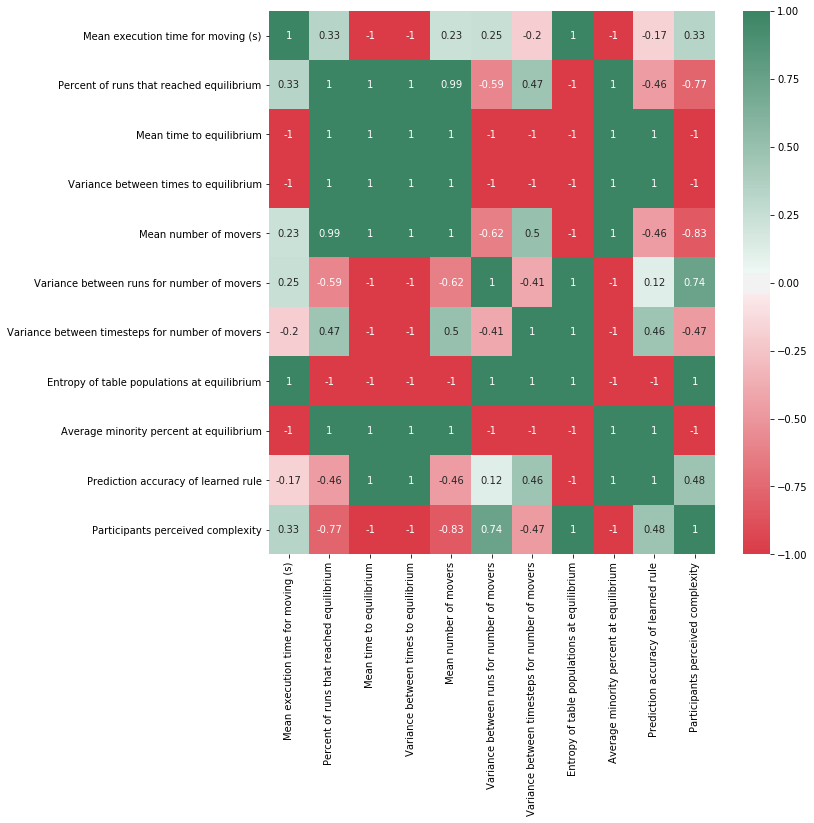

In [37]:
# rename columns
rename_dict = {'game_name': 'game_name', 'mean_happiness_checking_duration': 'Mean execution time for moving (s)', 'percent_of_runs_not_ended_in_100_timesteps': 'Percent of runs that reached equilibrium', 'mean_time_to_equilibrium': 'Mean time to equilibrium', 'variance_between_time_to_equilibriums': 'Variance between times to equilibrium', 'mean_number_of_unhappy': 'Mean number of movers', 'variance_in_unhappiness_between_timesteps': 'Variance between timesteps for number of movers', 'variance_in_unhappiness_between_games': 'Variance between runs for number of movers', 'entropy_of_final_table_populations': 'Entropy of table populations at equilibrium', 'variance_of_table_population_entropies': 'variance_of_table_population_entropies', 'average_minority_percent': 'Average minority percent at equilibrium', 'perceived_complexity': 'Participants'' perceived complexity', 'satisfaction': 'Participants'' satisfaction'}
game_summaries_df = game_summaries_df.rename(columns=rename_dict)    
game_summaries_df = game_summaries_df[['Mean execution time for moving (s)', 'Percent of runs that reached equilibrium', 'Mean time to equilibrium', 'Variance between times to equilibrium', 'Mean number of movers', 'Variance between runs for number of movers', 'Variance between timesteps for number of movers', 'Entropy of table populations at equilibrium', 'Average minority percent at equilibrium', 'Prediction accuracy of learned rule', 'Participants'' perceived complexity', ]]
# game_summaries_df = game_summaries_df.drop(columns=['game_name', 'variance_of_table_population_entropies'])

# heatmap
fig, ax = plt.subplots(figsize=(10,10))  
red_white_green = sns.diverging_palette(10, 150, as_cmap=True)
sns.heatmap(game_summaries_df.corr(), annot=True, cmap=red_white_green)

In [ ]:
np.corr()

In [41]:
game_summaries_df[['Participants'' perceived complexity','Variance between timesteps for number of movers']][1:].corr()

,Participants perceived complexity,Variance between timesteps for number of movers
Participants perceived complexity,1.000000,0.073403
Variance between timesteps for number of movers,0.073403,1.000000


# 4. Perceived complexity vs Satisfaction

In [3]:
perceived_complexity_df = pd.read_csv('./data/perceived_complexity.csv')
perceived_complexity_df.index = perceived_complexity_df['Participant alias']
perceived_complexity_df = perceived_complexity_df.drop(columns=['Participant alias'])
stacked_complexity_df = pd.DataFrame(perceived_complexity_df.unstack())
stacked_complexity_df.reset_index(inplace=True)  
stacked_complexity_df.columns = ['Game', 'Participant', 'Perceived complexity']


satisfaction_df = pd.read_csv('./data/satisfaction.csv')
satisfaction_df.index = satisfaction_df['Participant alias']
satisfaction_df = satisfaction_df.drop(columns=['Participant alias', 'Original Game'])
stacked_satisfatcion_df = pd.DataFrame(satisfaction_df.unstack())
stacked_satisfatcion_df.reset_index(inplace=True)  
stacked_satisfatcion_df.columns = ['Game', 'Participant', 'Satisfaction']

In [4]:
complexity_vs_satisfaction_df = pd.merge(stacked_complexity_df, stacked_satisfatcion_df, on=['Game', 'Participant'], how='inner')

In [6]:
complexity_vs_satisfaction_df[complexity_vs_satisfaction_df['Perceived complexity']==3]

,Game,Participant,Perceived complexity,Satisfaction
8,Game 1,Garden,3,1
10,Game 1,Horses,3,3
20,Game 2,Peace,3,2
23,Game 2,Culture,3,2
27,Game 2,Hiking,3,1
29,Game 2,Sun,3,1
31,Game 2,Climate,3,2
32,Game 2,Silence,3,2
36,Game 2,University,3,1
37,Game 2,Trees,3,1


c:\programdata\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


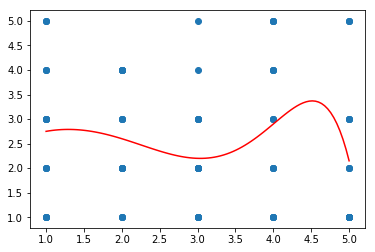

In [55]:
import matplotlib.pyplot as plt

x = complexity_vs_satisfaction_df['Perceived complexity']
y = complexity_vs_satisfaction_df['Satisfaction']
mymodel = np.poly1d(np.polyfit(x, y, 9))

myline = np.linspace(1, 5, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline),'r')
plt.show()

In [52]:
complexity_vs_satisfaction_df.to_csv("./data/perceived_complexity_vs_satisfaction.csv", index=False)

In [20]:
individual_ratings = individual_ratings = pd.merge(perceived_complexity_df, satisfaction_df, on='Participant alias', how='inner', suffixes=[' perceived complexity', ' satisfaction'])
individual_ratings

,Participant alias,Game 1 perceived complexity,Game 2 perceived complexity,Game 3 perceived complexity,Game 4 perceived complexity,Game 5 perceived complexity,Original Game,Game 1 satisfaction,Game 2 satisfaction,Game 3 satisfaction,Game 4 satisfaction,Game 5 satisfaction
0,Peace,2,3,4,5,1,5.0,2,2,4,3,1
1,Church,1,4,3,5,2,2.0,5,4,1,1,1
2,Dogs,1,4,3,5,2,3.0,3,3,2,1,2
3,Culture,2,3,4,5,1,2.0,4,2,5,2,1
4,Nature,1,4,3,5,2,3.0,4,1,2,1,3
5,Circus,2,5,3,4,1,3.0,2,1,3,2,1
6,Summer,2,5,4,3,1,3.0,4,1,5,5,3
7,Hiking,2,3,4,5,1,3.0,3,1,2,1,2
8,Garden,3,1,4,5,2,NaN,1,1,4,3,2
9,Sun,2,3,5,4,1,2.0,4,1,2,3,5


In [22]:
individual_ratings[['Game 1 perceived complexity', 'Game 1 satisfaction']]

,Game 1 perceived complexity,Game 1 satisfaction
0,2,2
1,1,5
2,1,3
3,2,4
4,1,4
5,2,2
6,2,4
7,2,3
8,3,1
9,2,4
